# K-means clustering

## Loading digits dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print("Digits: %i samples %i features" % digits.data.shape)

Digits: 1797 samples 64 features


## Exploratory data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('ggplot')

#print(digits.target_names)

#X = digits.data
#y = digits.target
#df = pd.DataFrame(X, columns = digits.feature_names)
#print(df.head())

## Mall Customer Segmentation Data (kaggle)

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


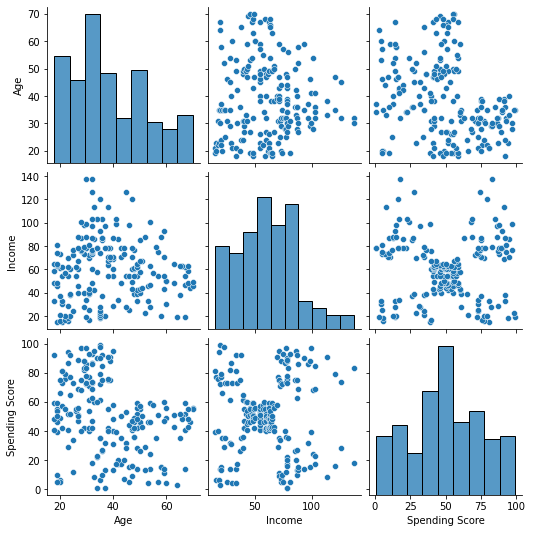

In [7]:
sns.pairplot(df[["Age", "Income", "Spending Score"]])

In [8]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++")
kmeans = kmeans.fit(df[["Spending Score", "Income"]])
kmeans.cluster_centers_

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

In [9]:
df["Clusters"] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [10]:
df["Clusters"].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Spending Score'>

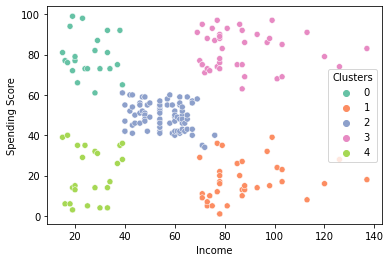

In [11]:
sns.scatterplot(data = df, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [18]:
#column_titles = {"Customer ID", "Gender", "Age", "Income", "Spending Score", "Clusters"}

def create_clustered_dfs():
    df1 = df[df["Cluster"] == 0]
    df2 = df[df["Cluster"] == 1]
    df3 = df[df["Cluster"] == 2]
    df4 = df[df["Cluster"] == 3]
    df5 = df[df["Cluster"] == 4]
        

#def create_three_diverse_dfs():
    #column_titles = {"Customer ID", "Gender", "Age", "Income", "Spending Score", "Clusters"}
    #df6 = pd.DataFrame(columns = column_titles)
    #df7 = pd.DataFrame(columns = column_titles)
    #df8 = pd.DataFrame(columns = column_titles)
    
def split_dataframe_by_position(df, splits):
    """
    Takes a dataframe and an integer of the number of splits to create.
    Returns a list of dataframes.
    """
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes

create_clustered_dfs()
split_dataframes = split_dataframe_by_position(df1, 3)
print(split_dataframes[1])
    


    

KeyError: 'Cluster'